In [21]:
import torch

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
words = open('names.txt', 'r').read().splitlines()
len(words)

32033

In [6]:
words[:3]

['emma', 'olivia', 'ava']

In [7]:
min(len(w) for w in words)

2

In [8]:
max(len(w) for w in words)

15

In [12]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) +1

In [19]:
#b

In [31]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [36]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [39]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1 

(-0.5, 26.5, 26.5, -0.5)

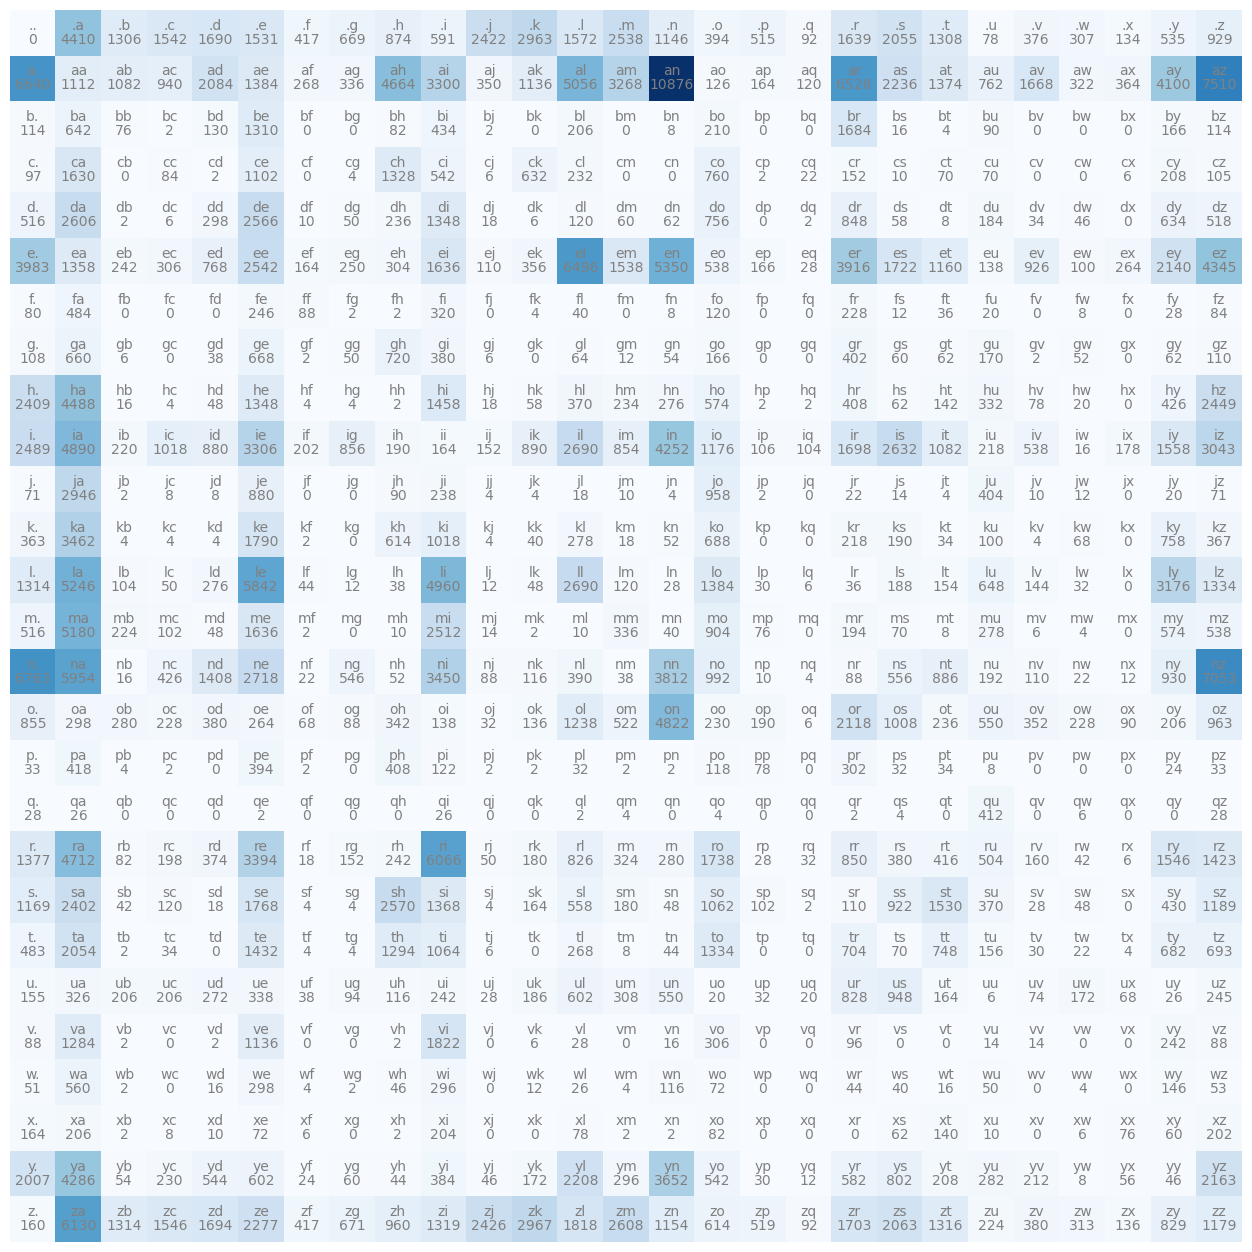

In [40]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [42]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [49]:
type(N[0])

torch.Tensor

In [52]:
karpathy_seed = 2147483647

In [53]:
g = torch.Generator().manual_seed(karpathy_seed)
p = torch.rand(3, generator=g)
p

tensor([0.7081, 0.3542, 0.1054])

In [54]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [58]:
g = torch.Generator().manual_seed(karpathy_seed)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [100]:
g = torch.Generator().manual_seed(karpathy_seed)
#g = torch.Generator().manual_seed(1)

for i in range(30):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        #p = torch.ones(27) / 27.0
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))

cexzmazjallurailezkaynnellzimittain.
llaynzkanza.
stazthubrtthrigotai.
mozjellavo.
ke.
teda.
kalemimmsadey.
nkaviynyzftlspihinivenvorhlasu.
dsordelezgl.
penzaisana.
razdineeezka.
deru.
firit.
gaikajahzabevare.
kiystzelenzanzmenah.
keenzxzalezalmahavazsorozysoshlaitenzmzeegzsiseriyzann.
illeleldolezmeezhalamigamanemin.
asharin.
alcalar.
jayzkazve.
sezazelyzchay.
ranzjazcyviazisashougenil.
beynzarzeallan.
annutetoradzalia.
rddeman.
me.
vifazdaiazazazkyi.
gh.
cryalanzrlaylmazm.
ron.


In [79]:
P = N.float()

In [80]:
p.shape

torch.Size([27])

In [84]:
P.sum(), P.sum().shape

(tensor(456292.), torch.Size([]))

In [87]:
P.sum(0).shape

torch.Size([27])

In [86]:
P.sum(0, keepdim=True).shape

torch.Size([1, 27])

In [89]:
P.sum(0, keepdim=True)

tensor([[32033., 67770.,  5290.,  7064., 10992., 40846.,  1810.,  3854., 15232.,
         35402.,  5800., 10080., 27916., 13284., 36654., 15868.,  2052.,   544.,
         25400., 16212., 11140.,  6270.,  5146.,  1858.,  1394., 19552., 36829.]])

In [90]:
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [91]:
P.sum(1, keepdim=True)

tensor([[32033.],
        [67770.],
        [ 5290.],
        [ 7064.],
        [10992.],
        [40846.],
        [ 1810.],
        [ 3854.],
        [15232.],
        [35402.],
        [ 5800.],
        [10080.],
        [27916.],
        [13284.],
        [36654.],
        [15868.],
        [ 2052.],
        [  544.],
        [25400.],
        [16212.],
        [11140.],
        [ 6270.],
        [ 5146.],
        [ 1858.],
        [ 1394.],
        [19552.],
        [36829.]])

Interestingly, the sum of the rows and the sum of the columns is the same. This is not at all a normal thing and occurs here solely because we created each cell value as a count of bigrams.

In [97]:
P = N.float()
P /= P.sum(1, keepdim=True) # /= is inplace/no new memory if possible
# above follows broadcasting rules so is 'broadcastable', so
# the 27, 1 shape conceptually is a 27, 27, and then the '/'
# is element-wise - ultimately this normalizes, BY ROW

In [93]:
P[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [95]:
P[0].sum() 
# each row sums to 1, so is a probability distribution, showing
# the probability of the second char given the first char

tensor(1.)

And now we can just use the pre-calculated probability distributions, which we have one per row, rather than calculating the probability distribution each time.

In [96]:
g = torch.Generator().manual_seed(karpathy_seed)
#g = torch.Generator().manual_seed(1)

for i in range(30):
    out = []
    ix = 0
    while True:
        p = P[ix]
        #p = N[ix].float()
        #p = p / p.sum()
        #p = torch.ones(27) / 27.0
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))

cexzmazjallurailezkaynnellzimittain.
llaynzkanza.
stazthubrtthrigotai.
mozjellavo.
ke.
teda.
kalemimmsadey.
nkaviynyzftlspihinivenvorhlasu.
dsordelezgl.
penzaisana.
razdineeezka.
deru.
firit.
gaikajahzabevare.
kiystzelenzanzmenah.
keenzxzalezalmahavazsorozysoshlaitenzmzeegzsiseriyzann.
illeleldolezmeezhalamigamanemin.
asharin.
alcalar.
jayzkazve.
sezazelyzchay.
ranzjazcyviazisashougenil.
beynzarzeallan.
annutetoradzalia.
rddeman.
me.
vifazdaiazazazkyi.
gh.
cryalanzrlaylmazm.
ron.


He says to 'read through' the broadcasting semantics, and 'be very careful with it'. It's complicated and can lead to bugs. (He shows one caused by leaving keepdim in sum as False which leads to different broadcasting behavior.)

I got through 50m 14s at this point.

Now, thinking about measuring how good the model is at producing things that match what it was given - i.e., at producing names.

We use "maximum likelihood estimation", I think. What the model has is the probability of any particular bigram. Treating the data we fed the model to train it as what we want to get, we can calculate the probability of any particular name by multiplying the individual probabilities of each bigram in the name - taking the product of all the indiv probabilities. A model that does a good job at producing the names we fed it will have high probabilities _for the names we fed it in training_. If each bigram has a probability of 1, the product will be 1 - the best we can possibly have.

The resulting final number (per name) is very small - because multiplying many numbers between 0-1 together gives even smaller results - and bigger numbers are better - because they result from bigger individual probabilities.

For the sake of matching convention w/ training models (where we want a loss function where lower numbers are better) and ease of computation (to avoid numbers that are very close to zero), we typically use a log (to get numbers that are bigger) and take the negative of the log (so smaller numbers are better). 

Remembering log math, the log of 1 (the best result) is 0, so the best possible log result is 0. As the actual result goes to 0 (the worst result), the log gets more negative. Also, a*b*c = log a + log b + log c, so rather than multiplying to get the probability, we add.

Also, we sometimes want to look at the performance per character/bigram (I think because longer names will naturally have smaller probabilities since we're multiplying more numbers together), so we calc the full probability of all the bigrams as above, and then divide by the number of bigrams to get the average probability.

He wrote down:

- GOAL: maximize likelihood of the data wrt model parameters (statistical modeling)
- equivalent to maximizing the log likelihood (because log is monotonic - i.e., the log operation just scales the likelihood)
- equivalent to minimizing the negative log likelihood
- equivalent to minimizing the average negative log likelihood

In [105]:
log_likelihood = 0.0
n = 0

for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

.e: 0.0478 -3.0408
em: 0.0377 -3.2793
mm: 0.0253 -3.6772
ma: 0.3899 -0.9418
a.: 0.0980 -2.3230
.o: 0.0123 -4.3982
ol: 0.0780 -2.5508
li: 0.1777 -1.7278
iv: 0.0152 -4.1867
vi: 0.3541 -1.0383
ia: 0.1381 -1.9796
a.: 0.0980 -2.3230
.a: 0.1377 -1.9829
av: 0.0246 -3.7045
va: 0.2495 -1.3882
a.: 0.0980 -2.3230


This is 1:00:28.